In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay ,f1_score ,r2_score

from sklearn.svm import SVR

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('balling and roughness (4).xlsx', sheet_name = 'Sheet3')
df

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,"surface tension, N/m",spatter,VED,p,pi,meltpool shape.1,m,effective power,analytical width,ref
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,-237.920389,Spatter,37.004658,0.107712,243.608628,blank,Conduction Mode,102.319994,15.846466,https://www.sciencedirect.com/science/article/...
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,-201.276391,Spatter,31.453959,0.091556,226.538896,blank,Conduction Mode,94.121044,13.273756,NaN
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,-172.905271,Spatter,27.351269,0.079614,215.573584,blank,Conduction Mode,86.934645,11.071858,NaN
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,-150.448638,Spatter,24.195353,0.070427,204.291009,blank,Conduction Mode,80.649475,9.356739,NaN
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,-132.335280,Spatter,21.692386,0.063142,199.089804,blank,Conduction Mode,75.139529,7.934597,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,-620.499381,no spatter,176.928521,0.686667,1135.579204,blank,Transition Mode,349.341321,162.122605,NaN
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,-552.006536,no spatter,141.542817,0.549333,958.791540,blank,Transition Mode,347.689251,152.945381,NaN
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,-499.215539,no spatter,117.952347,0.457778,827.861490,blank,Transition Mode,344.664948,145.719245,NaN
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,-456.050759,no spatter,101.102012,0.392381,719.163233,blank,Conduction Mode,340.301603,139.950613,NaN


In [8]:
# Assuming df is your DataFrame
columns_to_delete = ['ref',
                     'surface temperature T_s , K', 'surface tension, N/m','Peak temp. , K','recoil pressure , pa', 'Unnamed: 20','spatter' ,'p']  # List of columns to delete



# Deleting the specified columns
df1 = df.drop(columns=columns_to_delete, inplace=False)
df1.shape

(301, 28)

In [9]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'LOF': 0, 'keyhole': 1, 'Desired': 2, 'balling': 3}

# Replace values in the 'melt pool shape' column using the mapping
df1['meltpool shape'] = df1['meltpool shape'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'melt pool shape' column:")
df1

DataFrame after replacing values in 'melt pool shape' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,meltpool shape.1,m,effective power,analytical width
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,blank,Conduction Mode,102.319994,15.846466
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,484.848485,7.385967,0.679509,0.946459,31.453959,226.538896,blank,Conduction Mode,94.121044,13.273756
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,484.848485,6.748390,0.528135,1.118781,27.351269,215.573584,blank,Conduction Mode,86.934645,11.071858
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,484.848485,7.955675,0.416143,1.273442,24.195353,204.291009,blank,Conduction Mode,80.649475,9.356739
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,484.848485,6.665874,0.330995,1.405504,21.692386,199.089804,blank,Conduction Mode,75.139529,7.934597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,2090.000000,3.550000,89.262943,0.007957,176.928521,1135.579204,blank,Transition Mode,349.341321,162.122605
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,1840.000000,3.800000,65.927109,0.011478,141.542817,958.791540,blank,Transition Mode,347.689251,152.945381
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,1630.000000,3.860000,51.695324,0.015553,117.952347,827.861490,blank,Transition Mode,344.664948,145.719245
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,1430.000000,3.860000,42.142234,0.020133,101.102012,719.163233,blank,Conduction Mode,340.301603,139.950613


In [10]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'Conduction Mode': 0, 'Transition Mode': 1, 'Keyhole Mode': 2}

# Replace values in the 'melt pool shape' column using the mapping
df1['m'] = df1['m'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'm' column:")
df1

DataFrame after replacing values in 'm' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,meltpool shape.1,m,effective power,analytical width
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,blank,0,102.319994,15.846466
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,484.848485,7.385967,0.679509,0.946459,31.453959,226.538896,blank,0,94.121044,13.273756
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,484.848485,6.748390,0.528135,1.118781,27.351269,215.573584,blank,0,86.934645,11.071858
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,484.848485,7.955675,0.416143,1.273442,24.195353,204.291009,blank,0,80.649475,9.356739
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,484.848485,6.665874,0.330995,1.405504,21.692386,199.089804,blank,0,75.139529,7.934597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,2090.000000,3.550000,89.262943,0.007957,176.928521,1135.579204,blank,1,349.341321,162.122605
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,1840.000000,3.800000,65.927109,0.011478,141.542817,958.791540,blank,1,347.689251,152.945381
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,1630.000000,3.860000,51.695324,0.015553,117.952347,827.861490,blank,1,344.664948,145.719245
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,1430.000000,3.860000,42.142234,0.020133,101.102012,719.163233,blank,0,340.301603,139.950613


In [11]:
columns_to_delete = ['surface tension / spot size' ,'depth/thickness',	'length/width' ,	'width/depth']  # List of columns to delete



# Deleting the specified columns
df2 = df1.drop(columns=columns_to_delete, inplace=False)
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,meltpool shape.1,m,effective power,analytical width
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,2,0.511600,7800,...,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,blank,0,102.319994,15.846466
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,2,0.470605,7800,...,484.848485,7.385967,0.679509,0.946459,31.453959,226.538896,blank,0,94.121044,13.273756
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,2,0.434673,7800,...,484.848485,6.748390,0.528135,1.118781,27.351269,215.573584,blank,0,86.934645,11.071858
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,0,0.403247,7800,...,484.848485,7.955675,0.416143,1.273442,24.195353,204.291009,blank,0,80.649475,9.356739
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2,0.375698,7800,...,484.848485,6.665874,0.330995,1.405504,21.692386,199.089804,blank,0,75.139529,7.934597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,2,0.698683,7800,...,2090.000000,3.550000,89.262943,0.007957,176.928521,1135.579204,blank,1,349.341321,162.122605
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,0,0.695379,7800,...,1840.000000,3.800000,65.927109,0.011478,141.542817,958.791540,blank,1,347.689251,152.945381
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,0,0.689330,7800,...,1630.000000,3.860000,51.695324,0.015553,117.952347,827.861490,blank,1,344.664948,145.719245
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,0,0.680603,7800,...,1430.000000,3.860000,42.142234,0.020133,101.102012,719.163233,blank,0,340.301603,139.950613


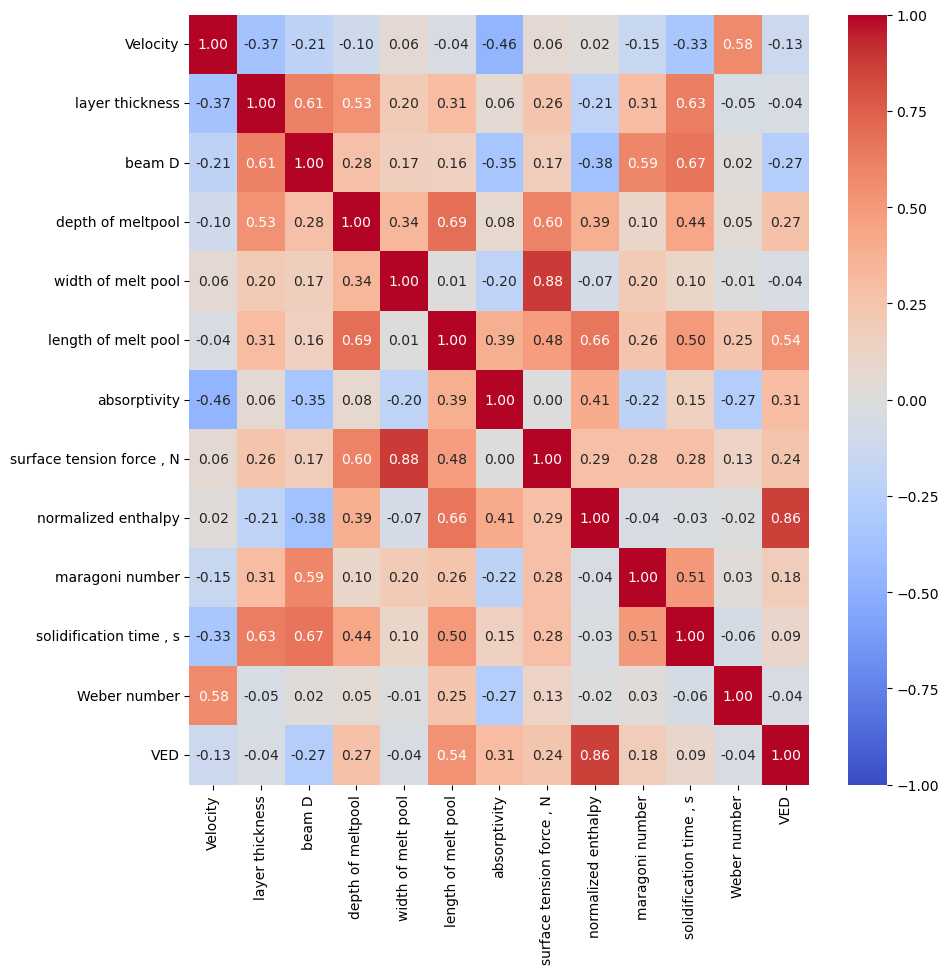

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Define the list of features (independent variables) and the target variable
features = ['Velocity', 'layer thickness', 'beam D',  'depth of meltpool',	'width of melt pool',	'length of melt pool'
            , 'absorptivity', 'surface tension force , N', 
            'normalized enthalpy', 'maragoni number', 
            'solidification time , s', 'Weber number', 'VED']
# target_variable = 'width of melt pool'  # Replace 'target_variable' with your actual target variable

# Calculate the pairwise correlation matrix
correlation_matrix = df2[features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Plot the heatmap of the correlation matrix


# Save the figure
plt.savefig('correlation_heatmap.png', bbox_inches='tight')



In [13]:
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,meltpool shape.1,m,effective power,analytical width
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,2,0.511600,7800,...,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,blank,0,102.319994,15.846466
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,2,0.470605,7800,...,484.848485,7.385967,0.679509,0.946459,31.453959,226.538896,blank,0,94.121044,13.273756
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,2,0.434673,7800,...,484.848485,6.748390,0.528135,1.118781,27.351269,215.573584,blank,0,86.934645,11.071858
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,0,0.403247,7800,...,484.848485,7.955675,0.416143,1.273442,24.195353,204.291009,blank,0,80.649475,9.356739
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2,0.375698,7800,...,484.848485,6.665874,0.330995,1.405504,21.692386,199.089804,blank,0,75.139529,7.934597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,2,0.698683,7800,...,2090.000000,3.550000,89.262943,0.007957,176.928521,1135.579204,blank,1,349.341321,162.122605
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,0,0.695379,7800,...,1840.000000,3.800000,65.927109,0.011478,141.542817,958.791540,blank,1,347.689251,152.945381
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,0,0.689330,7800,...,1630.000000,3.860000,51.695324,0.015553,117.952347,827.861490,blank,1,344.664948,145.719245
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,0,0.680603,7800,...,1430.000000,3.860000,42.142234,0.020133,101.102012,719.163233,blank,0,340.301603,139.950613


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [15]:
import pandas as pd

def detect_outliers_zscore_all(df2, num_stds=3):
  """
  This function detects outliers based on z-scores within a specified number of standard deviations for all numerical columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      num_stds (int, optional): The number of standard deviations to consider outliers. Defaults to 3.

  Returns:
      pandas.DataFrame: A DataFrame with columns indicating outliers (True) or inliers (False) for each numerical column.
      pandas.Index: The indices of rows containing outliers in any column.
  """
  outliers_df2 = pd.DataFrame(index=df2.index)  # Create an empty DataFrame for outliers
  outlier_indices = []  # Initialize a list to store outlier row indices
  for col in df2.select_dtypes(include=[np.number]):  # Iterate through numerical columns
    outliers = abs(df2[col] - df2[col].mean()) / df2[col].std() > num_stds
    outliers_df2[f'outliers_{col}'] = outliers  # Add a column named 'outliers_{col}' with outlier flags
    outlier_indices.extend(outliers[outliers].index)  # Add outlier indices to the list
  return outliers_df2, pd.Index(outlier_indices)  # Return outlier flags DataFrame and outlier indices

# Assuming 'filtered_df2' is your prepared DataFrame and 'threshold' is defined

# Calculate z-scores and identify outlier indices
outliers_df2, outlier_indices_zscore = detect_outliers_zscore_all(df2.copy())

# **Important: Consider if removing outliers is the best approach**
# (See previous discussion about potential drawbacks of removing outliers)

# If you decide to remove outliers:
# Drop the rows corresponding to the outlier indices
df3 = df2.drop(outlier_indices_zscore)

# Display the cleaned DataFrame (optional)
print("DataFrame after removing outliers detected by z-score method:")
print(df3.shape)


DataFrame after removing outliers detected by z-score method:
(244, 24)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'filtered_df_cleaned' is your cleaned DataFrame containing the data
# Assuming 'X' contains features and 'y_width' contains the target variable 'width of melt pool'

# Split the dataset into features (X) and the target variable (y_width)
# X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','density kg/m^3',	'Weber number','conductivity w/m.k','layer thickness'	,'beam D',	'specific heat J/kg.k',	'surface tension force , N',	'normalized enthalpy',	'maragoni number',	'aspect ratio length/depth',	'solidification time , s',	'VED',	'effective power'])  # Features excluding the target variable
y_width = df3['width of melt pool']  # Target variable

In [17]:
# X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','density kg/m^3',	'Weber number','conductivity w/m.k','layer thickness',	'beam D',	'specific heat J/kg.k',	'surface tension force , N',	'normalized enthalpy',	'maragoni number',	'aspect ratio length/depth',	'solidification time , s',	'VED',	'effective power'])

In [18]:
# X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','density kg/m^3',	'Weber number','conductivity w/m.k','layer thickness',	'beam D',	'specific heat J/kg.k',	'aspect ratio length/depth',	'Power'])

In [24]:
X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','absorptivity',	'Weber number',		'Power','pi','meltpool shape.1','m','analytical width','aspect ratio length/depth'])

In [25]:
X

,Velocity,layer thickness,beam D,density kg/m^3,conductivity w/m.k,specific heat J/kg.k,"surface tension force , N",normalized enthalpy,maragoni number,"solidification time , s",VED,effective power
0,850.0,30.0,90.0,7800,27.498167,500,0.002374,8.762277,484.848485,0.891650,37.004658,102.319994
1,1000.0,30.0,90.0,7800,25.116305,500,0.002134,7.431092,484.848485,0.679509,31.453959,94.121044
2,1150.0,30.0,90.0,7800,23.272181,500,0.001894,6.400441,484.848485,0.528135,27.351269,86.934645
3,1300.0,30.0,90.0,7800,21.812499,500,0.001701,5.584648,484.848485,0.416143,24.195353,80.649475
4,1450.0,30.0,90.0,7800,20.635130,500,0.001524,4.926635,484.848485,0.330995,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...
276,140.0,100.0,80.0,7800,82.775232,500,0.005334,39.655745,585.000000,11.601815,319.893085,157.498139
277,170.0,100.0,80.0,7800,76.205951,500,0.004998,35.984279,537.000000,8.914828,263.441364,157.486220
278,200.0,100.0,80.0,7800,71.165011,500,0.004759,33.166978,424.000000,7.202000,223.925159,157.444030
279,290.0,100.0,80.0,7800,60.914802,500,0.004333,27.438300,320.000000,4.525086,154.431144,156.841684


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized dataset into training and testing sets (80% train, 25% test)
X_train, X_test, y_width_train, y_width_test = train_test_split(X_scaled, y_width, test_size=0.25, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = {}

# Define a list of different values for cross-validation
cv_values = [5, 10]

# Perform Grid Search with cross-validation for each value of cv
for cv in cv_values:
    # Initialize Random Forest Regressor
    random_forest = RandomForestRegressor(random_state=42)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(random_forest, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_width_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"\nResults for width prediction with cv={cv}:")
    print("Best hyperparameters:", best_params)

    # Initialize Random Forest Regressor with the best hyperparameters
    random_forest_best = RandomForestRegressor(**best_params, random_state=42)

    # Perform cross-validation to calculate RMSE
    rmse_scores = np.sqrt(-cross_val_score(random_forest_best, X_train, y_width_train, cv=cv, scoring='neg_mean_squared_error'))
    print(f"Mean RMSE with cv={cv}: {np.mean(rmse_scores)}")

    # Fit the model on the entire training set with the best hyperparameters
    random_forest_best.fit(X_train, y_width_train)

    # Predict width using the trained model
    y_width_pred = random_forest_best.predict(X_test)

    # Calculate R-squared (R^2) for width prediction
    r2_width = r2_score(y_width_test, y_width_pred)
    print(f"R-squared for width prediction with cv={cv}: {r2_width}")
    
     # Store results for this CV fold
    results[cv] = {
        'best_params': best_params,
        'mean_rmse': rmse_scores,
        'r_squared': r2_width
    }

# Find the CV fold with the lowest mean RMSE
best_cv_fold = min(results, key=lambda x: np.mean(results[x]['mean_rmse']))
best_params_overall = results[best_cv_fold]['best_params']
best_mean_rmse = results[best_cv_fold]['mean_rmse']
best_r2 = results[best_cv_fold]['r_squared']

# Print results, highlighting the absolute best
print(f"\nAbsolute Best Results (CV Fold: {best_cv_fold}):")
print("Best hyperparameters:", best_params_overall)
print("Mean RMSE:", best_mean_rmse)
print("R-squared:", best_r2)



Results for width prediction with cv=5:
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean RMSE with cv=5: 33.6576237290725
R-squared for width prediction with cv=5: 0.8707879465658814

Results for width prediction with cv=10:
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean RMSE with cv=10: 32.06709767420482
R-squared for width prediction with cv=10: 0.8707879465658814

Absolute Best Results (CV Fold: 10):
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean RMSE: [35.91900018 35.90990551 68.16639563 31.51384749 34.6595645  19.50175813
 28.24587563 17.18903585 29.07189422 20.49369961]
R-squared: 0.8707879465658814


In [27]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 13.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
import shap

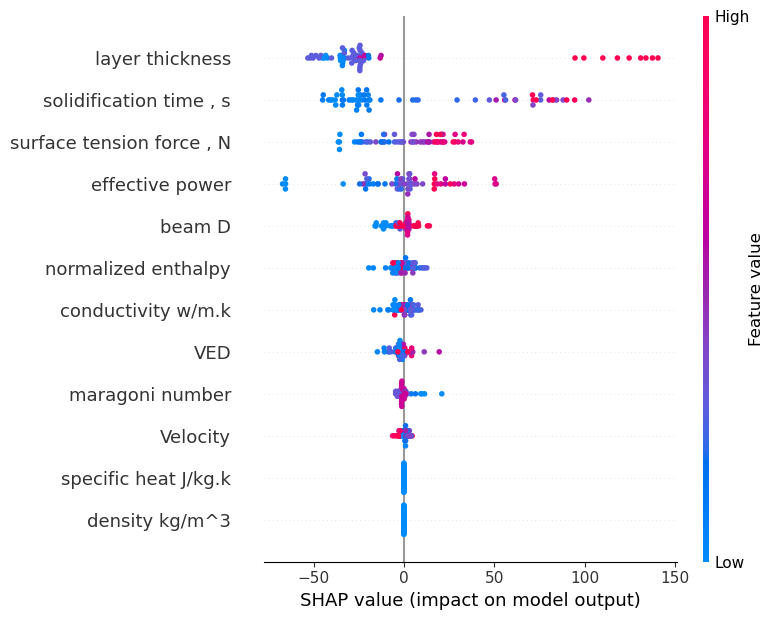

<Figure size 640x480 with 0 Axes>

In [31]:
# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_width_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Get the current figure
fig = plt.gcf()

# Access the color bars
colorbars = fig.get_axes()[1:3]  # Get the first two axes which are the color bars

# Set a custom label for each color bar
for colorbar in colorbars:
    colorbar.set_ylabel('SHAP value (impact on Track Width)', fontsize=12)

# Rotate the color bars vertically
for colorbar in colorbars:
    colorbar.yaxis.label.set_rotation(90)

# Save the modified plot in high quality
plt.savefig('wshap_summary_plot.png', dpi=1200, bbox_inches='tight')


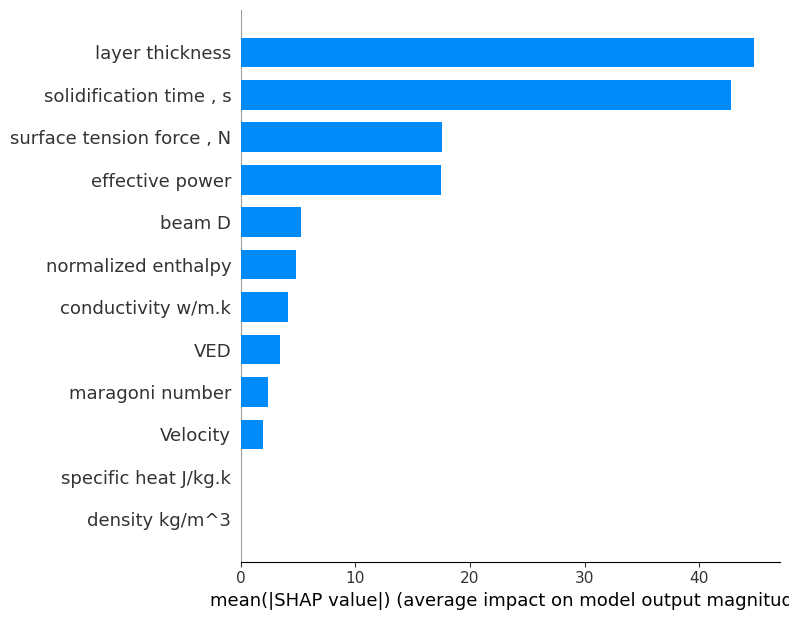

In [32]:
import matplotlib.pyplot as plt
import shap

# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_width_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Set the figure size
plt.figure(figsize=(16, 10))  # Adjust the width and height as needed

# Visualize the Mean SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X.columns, show=False)

# Get the current figure
fig = plt.gcf()

# Set the y-axis label
# plt.ylabel('Mean |SHAP value| (average impact on Track Width)', fontsize=14)

# Adjust layout to ensure all elements are within the plot
plt.tight_layout()

# Save the Mean SHAP plot in high quality
plt.savefig('wmean_shap_plot.png', dpi=300, bbox_inches='tight')



In [18]:
y_depth = df3['depth of meltpool']  # Target variabl

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized dataset into training and testing sets (80% train, 25% test)
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X_scaled, y_depth, test_size=0.25, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = {}

# Define a list of different values for cross-validation
cv_values = [5, 10]

# Perform Grid Search with cross-validation for each value of cv
for cv in cv_values:
    # Initialize Random Forest Regressor
    random_forest = RandomForestRegressor(random_state=42)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(random_forest, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_width_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"\nResults for width prediction with cv={cv}:")
    print("Best hyperparameters:", best_params)

    # Initialize Random Forest Regressor with the best hyperparameters
    random_forest_best = RandomForestRegressor(**best_params, random_state=42)

    # Perform cross-validation to calculate RMSE
    rmse_scores = np.sqrt(-cross_val_score(random_forest_best, X_train, y_depth_train, cv=cv, scoring='neg_mean_squared_error'))
    print(f"Mean RMSE with cv={cv}: {np.mean(rmse_scores)}")

    # Fit the model on the entire training set with the best hyperparameters
    random_forest_best.fit(X_train, y_depth_train)

    # Predict width using the trained model
    y_depth_pred = random_forest_best.predict(X_test)

    # Calculate R-squared (R^2) for width prediction
    r2_width = r2_score(y_depth_test, y_depth_pred)
    print(f"R-squared for width prediction with cv={cv}: {r2_width}")
    
     # Store results for this CV fold
    results[cv] = {
        'best_params': best_params,
        'mean_rmse': rmse_scores,
        'r_squared': r2_width
    }

# Find the CV fold with the lowest mean RMSE
best_cv_fold = min(results, key=lambda x: np.mean(results[x]['mean_rmse']))
best_params_overall = results[best_cv_fold]['best_params']
best_mean_rmse = results[best_cv_fold]['mean_rmse']
best_r2 = results[best_cv_fold]['r_squared']

# Print results, highlighting the absolute best
print(f"\nAbsolute Best Results (CV Fold: {best_cv_fold}):")
print("Best hyperparameters:", best_params_overall)
print("Mean RMSE:", best_mean_rmse)
print("R-squared:", best_r2)


Results for width prediction with cv=5:
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean RMSE with cv=5: 85.12052669216101
R-squared for width prediction with cv=5: 0.7760652297377675

Results for width prediction with cv=10:
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean RMSE with cv=10: 83.70292560903216
R-squared for width prediction with cv=10: 0.7760652297377675

Absolute Best Results (CV Fold: 10):
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean RMSE: [114.85679147  83.62586261  85.85419017  56.83081627  71.2064897
  65.79056498  73.2127356   83.8436288   88.82388685 112.98428964]
R-squared: 0.7760652297377675


In [ ]:
import matplotlib.pyplot as plt
import shap

# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_depth_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Set the figure size
plt.figure(figsize=(16, 10))  # Adjust the width and height as needed

# Visualize the Mean SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X.columns, show=False)

# Get the current figure
fig = plt.gcf()

# Set the y-axis label
plt.ylabel('Mean |SHAP value| (average impact on Depth)', fontsize=14)

# Adjust layout to ensure all elements are within the plot
plt.tight_layout()

# Save the Mean SHAP plot in high quality
plt.savefig('mean_shap_plot_depth.png', dpi=1200, bbox_inches='tight')


In [ ]:
# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_depth_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Get the current figure
fig = plt.gcf()

# Access the color bars
colorbars = fig.get_axes()[1:3]  # Get the first two axes which are the color bars

# Set a custom label for each color bar
for colorbar in colorbars:
    colorbar.set_ylabel('SHAP value (impact on Depth)', fontsize=12)

# Rotate the color bars vertically
for colorbar in colorbars:
    colorbar.yaxis.label.set_rotation(90)

# Save the modified plot in high quality
plt.savefig('shap_summary_plot_depth.png', dpi=1200, bbox_inches='tight')


In [20]:
y_length = df3['length of melt pool']

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y_length = df3['length of melt pool']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_length_train, y_length_test = train_test_split(X_scaled, y_length, test_size=0.25, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results_length = {}

# Define a list of different values for cross-validation
cv_values = [5]

# Perform Grid Search with cross-validation for each value of cv
for cv in cv_values:
    # Initialize Random Forest Regressor
    random_forest = RandomForestRegressor(random_state=42)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(random_forest, param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_length_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"\nResults for length prediction with cv={cv}:")
    print("Best hyperparameters:", best_params)

    # Initialize Random Forest Regressor with the best hyperparameters
    random_forest_best = RandomForestRegressor(**best_params, random_state=42)

    # Perform cross-validation to calculate RMSE
    rmse_scores = np.sqrt(-cross_val_score(random_forest_best, X_train, y_length_train, cv=cv, scoring='neg_mean_squared_error'))
    print(f"Mean RMSE with cv={cv}: {np.mean(rmse_scores)}")

    # Fit the model on the entire training set with the best hyperparameters
    random_forest_best.fit(X_train, y_length_train)

    # Predict length using the trained model
    y_length_pred = random_forest_best.predict(X_test)

    # Calculate R-squared (R^2) for length prediction
    r2_length = r2_score(y_length_test, y_length_pred)
    print(f"R-squared for length prediction with cv={cv}: {r2_length}")
    
    # Store results for this CV fold
    results_length[cv] = {
        'best_params': best_params,
        'mean_rmse': rmse_scores,
        'r_squared': r2_length
    }

# Find the CV fold with the lowest mean RMSE
best_cv_fold_length = min(results_length, key=lambda x: np.mean(results_length[x]['mean_rmse']))
best_params_overall_length = results_length[best_cv_fold_length]['best_params']
best_mean_rmse_length = results_length[best_cv_fold_length]['mean_rmse']
best_r2_length = results_length[best_cv_fold_length]['r_squared']

# Print results, highlighting the absolute best
print(f"\nAbsolute Best Results for Length Prediction (CV Fold: {best_cv_fold_length}):")
print("Best hyperparameters:", best_params_overall_length)
print("Mean RMSE:", best_mean_rmse_length)
print("R-squared:", best_r2_length)



Results for length prediction with cv=5:
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean RMSE with cv=5: 232.6120345089101
R-squared for length prediction with cv=5: 0.9381615766832417

Absolute Best Results for Length Prediction (CV Fold: 5):
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean RMSE: [224.8610055  206.72077942 330.47360127 153.5631882  247.44159815]
R-squared: 0.9381615766832417


In [ ]:
# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_length_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Get the current figure
fig = plt.gcf()

# Access the color bars
colorbars = fig.get_axes()[1:3]  # Get the first two axes which are the color bars

# Set a custom label for each color bar
for colorbar in colorbars:
    colorbar.set_ylabel('SHAP value (impact on Length)', fontsize=12)

# Rotate the color bars vertically
for colorbar in colorbars:
    colorbar.yaxis.label.set_rotation(90)

# Save the modified plot in high quality
plt.savefig('shap_summary_plot_length.png', dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import shap

# Train the RandomForestRegressor model with the best hyperparameters
random_forest_best.fit(X_train, y_length_train)

# Create the TreeExplainer
explainer = shap.TreeExplainer(random_forest_best)

# Generate SHAP values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Set the figure size
plt.figure(figsize=(16, 10))  # Adjust the width and height as needed

# Visualize the Mean SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X.columns, show=False)

# Get the current figure
fig = plt.gcf()

# Set the y-axis label
plt.ylabel('Mean |SHAP value| (average impact on length)', fontsize=14)

# Adjust layout to ensure all elements are within the plot
plt.tight_layout()

# Save the Mean SHAP plot in high quality
plt.savefig('mean_shap_plot_length.png', dpi=1200, bbox_inches='tight')